## 이미지 인식의 꽃, CNN 익히기

## Mnist 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터.
## 이 데이터셋을 이용해 과연 이 손글씨 이미지를 몇 %나 정확히 예측할 수 있을지 실전을 경험해 보자.

## Step 1. 데이터 전처리

In [74]:
#Mnist 데이터는 케라스를 이용해 간단히 불러올 수 있다.

from keras.datasets import mnist
from keras.utils import np_utils

### 불러온 이미지 데이터를 X로, 이 이미지에 0~9까지 붙인 이름표를 Y_class로 구분하여 명명한다.
### 또는 이 7만개의 이미지 중 train으로 테스트에 사용될 부분은 test로 불러오겠다.

In [75]:
## 필요한 라이브러리 불러오기

import numpy 
import sys
import tensorflow as tf

In [76]:
# seed 값을 설정한다.

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

### Mnist 데이터셋 불러오기

In [77]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [78]:
print("학습셋 이미지 수 : %d 개:" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개:
테스트셋 이미지 수 : 10000 개


## 학습셋과 이미지수, 테스트셋 이미지 수를 확인한다. ^^

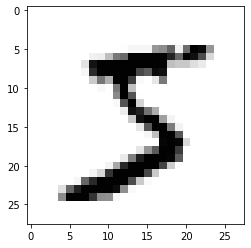

In [79]:
# 이제 그래프로 확인

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

### 이 이미지는 컴퓨터는 어떻게 인식할까?
### 이미지는 가로 28 x 세로 28 = 총 784개의 픽셀로 이루어져 있습니다. 각 픽셀은 밝기 정도에 따라 0부터 255까지의
### 등급을 매긴다. 흰색 배경이 0이라면, 글씨가 들어간 곳은 1~255까지의 숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합이 됨.

### 다음 코드로 이를 확인하자.

In [80]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### 바로 이렇게 이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용된다.
### 우리가 앞서 배운 여러 예제와 마찬가지로, 속성을 담은 데이털르 딥러닝에 집어놓고 클래스를 예측한는 문제를 전환시키는 것.
### 28 x 28 = 784개의 속성을 이용해 0~9까지 10개 클래스 중 하나를 맞히는 문제가 된다.

### 이제 주어진 가로 28 세로 28개의 2차원 배열을 1차원 배열로 바꾸어 주어야 한다.
### 이를 위해 reshape() 함수를 사용합니다.

In [81]:
X_train = X_train.reshape(X_train.shape[0], 784)

### 케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할때 최적의 성능을 보인다.
### 따라서 현재 0 ~ 255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 합니다. 바꾸는 방법은 각 값을 255로 나누는 것이다.
### 이 상황에서 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 데이터 정규화(normalization)라고 한다.

### 현재 주어진 데이터의 값은 0부터 255까지의 정수로, 정규화를 위해 255로 나누어 주려면 먼저 이 값을 실수형으로 바꿔야 한다.
### 따라서 다음과 같이 astype() 함수를 이용해 실수형으로 바꾼 뒤 255로 나눕니다.

In [82]:
X_train = X_train.astype('float64')
X_train = X_train / 255

### X_test에도 마찬가지로 이 작업을 적용한다. 다음과 같이 한번에 적용시키자.

In [83]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

### 자, 이제 숫자 이미지에 매겨진 이름을 확인해 볼 차례. 이제 우리는 앞서 불러온 숫자의 이미지가 5라는 것을 짐작이 가능.
### 실제로 이 숫자의 레이블이 어떤지를 불러오고자 Y_class_train[0]을 다음과 같이 출력 해본다.

In [84]:
print("class : %d " % (Y_class_train[0]))

class : 5 


### 그러면 이 숫자의 레이블 값인 5가 출력되는 것을 볼 수 있습니다.

## 근데 그 전에 아이리스 품종을 예측할 때 딥러닝의 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야 한다고 배웠다.
### 즉, 0~9까지의 정수형 값을 갖는 현재 형태에서 0 또는 1로만 이루어진 벡터로 값을 수정해야 한다.
### 지금까지 우리가 열어본 이미지의 class는 [5]였습니다. 이제 이를 [0,0,0,0,0,1,0,0,0,0] 으로 바꿔야한다.
### 이를 가능케 해주는 함수가 바로 np_utils.to_categorical() 함수이다. to_categorical(클래스, 클래스 개수)의 형식으로 지정한다.

In [85]:
# 바이러니화 과정

Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)

In [86]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 아래와 같이 원-핫 인코딩이 적용된 것을 확인 가능하다. 이것이 바로 딥러닝을 실행하기 전, 이미지 전처리 과제이다.